Problem Set 1: Text Classification
=============

In this problem set, you will build a system for automatically classifying reddit comments by subreddit. You will:

- Do some basic text processing, tokenizing your input and converting it into a bag-of-words representation
- Build a machine learning classifier based on the generative model, using Naive Bayes
- Evaluate your classifiers and examine what they have learned
- Build a machine learning classifier based on the discriminative model, using Perceptron
- Build more stable discriminative classifier, using the averaged perceptron
- Build the logistic regression classifier (See instructions within the section)
- Implement techniques to improve your classifier

# 0. Setup

In order to develop this assignment, you will need the following libraries. Many of these are part of [anaconda](https://www.continuum.io/downloads), so a good starting point would be to install that.

- [python 2.7](https://www.python.org/downloads/release/python-2710/) (and not Python 3, although if somebody wants to try that and tell us what goes wrong, that would be appreciated...)
- [jupyter notebook](http://jupyter.readthedocs.org/en/latest/install.html)
- [scipy](http://www.scipy.org/install.html)
- numpy (This will come if you install scipy like above, but if not install separately)
- [nltk](http://www.nltk.org/install.html) (tested on NLTK 3.0.4)
- [matplotlib](http://matplotlib.org/users/installing.html)
- [nosetests](https://nose.readthedocs.org/en/latest/)
- [pandas](http://pandas.pydata.org/) Dataframes

Here is some help on installing packages in python: https://packaging.python.org/installing/

I generally use ```pip --user``` for everything.

## About this assignment

- This is a Jupyter notebook. You can execute cell blocks by pressing control-enter.
- Most of your coding will be in the python source files in the directory ```gtnlplib```.
- **To submit this assignment, run the script ```make-submission.sh```, and submit the tarball ```pset1-submission.tgz``` on T-square.**

Grading will be mostly based on automated unit testing.

- The directory ```tests``` contains unit tests that are very similar to the tests that will be used to grade your assignment --- but not the same! 
- You should run these tests as you work on the assignment to see that you're on the right track. If you pass them in a non-adversarial way (i.e., you didn't write functions that target these tests directly), you will pass the tests that we use for grading. 
- Parts 1 and 2 are the foundation for the rest of the assignment. Don't even try to work on the later parts of the assignment until your code passes all tests for parts 1 and 2.
- The same is largely true within each part: for example, do not move on to deliverable 4.2 until your code passes the test for deliverable 4.1.
- You are free to look at the source code of the unit tests -- though most of the relevant code is also here in this notebook. Learn more about running unit tests at http://pythontesting.net/framework/nose/nose-introduction/
- You may want to add more tests, but that is completely optional.  

# 1. Preprocessing

Total: 1 point.

In [2]:
import pandas as pd

In [3]:
df_tr = pd.read_csv('reddit-train.csv',encoding='utf-8') # read the training data into a data frame
df_dv = pd.read_csv('reddit-dev.csv',encoding='utf-8') # read the dev data into a data frame

A dataframe is a structured representation of your data. You can preview your dataframes using ```head()```

In [4]:
df_tr.head()

,subreddit,text
0,science,Why don't you bother instead and respond prope...
1,iama,AAIA's ACES is the database standard (http://w...
2,iama,So many. I needed to perform a maintenance ru...
3,worldnews,Ukraine used to be part of Russia in the Sovie...
4,worldnews,This wiki article goes into how contentious th...


Your first task is to convert the text to a bag-of-words representation. There are three steps:

- Break each input into sentences
- Break each sentence into word "tokens"
- Downcase each token, and add it to a Counter

You should use NLTK to complete the tokenization step, and collections.Counter for the bag of words representation. For more about NLTK tokenization, see http://www.nltk.org/book/ch03.html

**Deliverable 1.1** Complete the function ```gtnlplib.preproc.tokenize_and_downcase```. (0.5 points)

In [5]:
from gtnlplib import preproc
reload(preproc); #terminal semicolon suppresses output

# when you edit gtnlplib/preproc.py, you will need to reload it into the notebook, using the line above

In [6]:
# this will not work until you implement it
y_tr,x_tr = preproc.read_data('reddit-train.csv', #filename
                                       'subreddit', #label field
                                       preprocessor=preproc.tokenize_and_downcase) #your preprocessor

In [7]:
y_dv,x_dv = preproc.read_data('reddit-dev.csv', #filename
                                       'subreddit', #label field
                                       preprocessor=preproc.tokenize_and_downcase) #your preprocessor
y_te,x_te = preproc.read_data('reddit-test.csv', #filename
                                       'subreddit', #label field
                                       preprocessor=preproc.tokenize_and_downcase) #your preprocessor

- Each element in the list ```x_tr``` is a counter, which corresponds to a bag of words.
- Each element in the list ```y_tr``` is a string, corresponding to a label.

In [8]:
i = 100
print 'ORIGINAL TEXT: ',df_tr.loc[i]['text']
print 
print 'BAG OF WORDS: ',x_tr[i]

ORIGINAL TEXT:  I saw an article recently stating that there was a link between angiotensin converting enzymes and Alzheimer's. It said that ACE was partially responsible for the break down of the protein fibers and plaques that form in Alzheimer's. To your knowledge, is there any truth to this and if so, is there a correlation between the prevalence of Alzheimer's and the use of ACE inhibitors in the last few decades?

Thank you for the work that you do! I am glad there are much smarter people than I working on research for these cognitive issues. 


EDIT: I'm really sad I missed this AMA. 

BAG OF WORDS:  Counter({u'the': 6, u'i': 5, u'and': 4, u'there': 4, u'.': 4, u'that': 4, u'alzheimer': 3, u'for': 3, u'of': 3, u"'s": 3, u'this': 2, u'is': 2, u'in': 2, u',': 2, u'to': 2, u'between': 2, u'you': 2, u'was': 2, u'a': 2, u'ace': 2, u'responsible': 1, u'few': 1, u'prevalence': 1, u'edit': 1, u'am': 1, u'it': 1, u'an': 1, u'down': 1, u'really': 1, u'ama': 1, u'are': 1, u'research': 1, u

You should now be able to pass the first test, ```test_preproc_d1_1```. 
Try this by running the following code on the command line:

```nosetests -v tests/test_pset1_preproc.py```

Now let's aggregate these counts, by running the code block below.

In [9]:
corpus_counts = preproc.get_corpus_counts(x_tr)

This makes it possible to see the top K most common terms.

In [10]:
corpus_counts.most_common(5)

[(u'.', 22920),
 (u'the', 20303),
 (u',', 19036),
 (u'to', 13252),
 (u'and', 11552)]

Word count distributions are said to follow [power law](https://en.wikipedia.org/wiki/Power_law) distributions. In practice, this means that a plot of the log-frequency against the log-rank is nearly linear. Let's see if this holds for our data.

In [11]:
# you need matplotlib version 1.4 or above
import matplotlib.pyplot as plt
import matplotlib
print matplotlib.__version__
%matplotlib inline

1.5.3


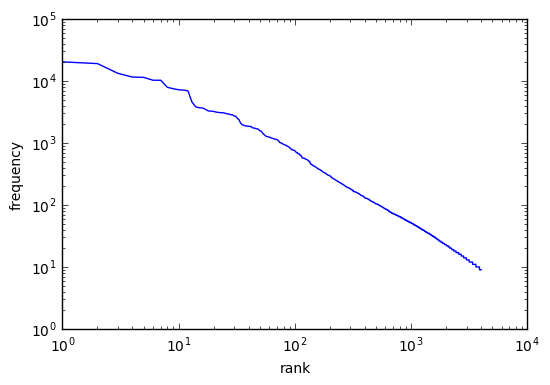

In [12]:
plt.loglog([val for word,val in corpus_counts.most_common(4000)])
plt.xlabel('rank')
plt.ylabel('frequency');

**Deliverable 1.2** Now let's compute some statistics about the training and dev data.

- Print the token/type ratio for the training data.
  You will have to implement ```gtnlplib.preproc_metrics.get_token_type_ratio``` (0.1 points)

- Print the number of types which appear exactly once in the training data.
  You will have to implement ```gtnlplib.preproc_metrics.type_frequency``` (0.1 points)

- Print the number of types that appear in the dev data but not the training data (hint: use [sets](https://docs.python.org/2/library/sets.html) for this)
  You will have to implement ```gtnlplib.preproc_metrics.unseen_types``` (0.1 points)
  
(0.3 points)

In [13]:
from gtnlplib.preproc_metrics import get_token_type_ratio,type_frequency,unseen_types

In [14]:
get_token_type_ratio(corpus_counts)

19.67109394737792

In [15]:
print type_frequency(corpus_counts,1)
print type_frequency(corpus_counts,10)

14134
263


Words that appear exactly once are called [hapax-legomena](https://en.wikipedia.org/wiki/Hapax_legomenon).

Now let's look at the dev data.

In [16]:
y_dv,x_dv = preproc.read_data('reddit-dev.csv', #filename
                                       'subreddit', #label field
                                       preprocessor=preproc.tokenize_and_downcase) #your preprocessor
corpus_counts_dv = preproc.get_corpus_counts(x_dv)
print get_token_type_ratio(corpus_counts_dv)

8.0507739212


Finally, let's compute the number of word types in the dev data, which do not appear in the training data

In [17]:
unseen_types(corpus_counts,corpus_counts_dv)

1737

Again, you can test your code by running ```nosetests -v tests/test_pset1_preproc.py```

**Deliverable 1.3** 

Why do you think the type-token ratio is lower for the dev data as compared to the training data?

Yes the dev set is smaller; why does this impact the type-token ratio? (0.2 pts)

*Please put your answer in the file gtnlplib/text-answers.md*

## Pruning the vocabulary

Now let's prune the vocabulary to words that have appeared more than ten times. 

Please run the following two code blocks.

In [18]:
vocab = [word for word,count in corpus_counts.iteritems() if count > 10]
print len(vocab)
print len(x_tr[0])

3600
86


This cutoff is chosen mainly for reasons of speed; in the bakeoff, you may want to have a larger vocabulary, assuming your classifiers are fast enough.

Run the code below to prune the data to this vocabulary. It will take a minute or two to complete.

In [19]:
x_tr = [{key:val for key,val in x_i.iteritems() if key in vocab} for x_i in x_tr]
x_dv = [{key:val for key,val in x_i.iteritems() if key in vocab} for x_i in x_dv]
x_te = [{key:val for key,val in x_i.iteritems() if key in vocab} for x_i in x_te]

In [20]:
print len(x_tr[0])

68


# 2. Linear classification

Now you'll implement the linear classification rule, $\hat{y} = \text{argmax}_y \theta^{\top} f(x,y)$.

You will use these functions in all classifiers in this assignment.

Total: 1 point.

In [21]:
from gtnlplib import clf_base
reload(clf_base)

from gtnlplib import constants
reload(constants);

**Deliverable 2.1** 

Recall from class and the reading that the feature function vector $f(x,y)$ can be viewed as a dict, in which the values are counts, and the keys are tuples $(y,x_j)$, where $y$ is a label and $x_j$ is a base feature.

Implement the function ```make_feature_vector``` in ```clf_base.py```. Desired output is shown below:

Note that you must also include the offset feature, ```gtnlplib.constants.OFFSET```.

(0.2 points)

In [22]:
fv = clf_base.make_feature_vector({'test':1,'case':2},'iama')

In [23]:
print fv

{('iama', '**OFFSET**'): 1, ('iama', 'case'): 2, ('iama', 'test'): 1}


Let's compute the entire set of labels.

In [24]:
labels = set(y_tr) #figure out all possible labels
print labels

set([u'worldnews', u'science', u'askreddit', u'iama', u'todayilearned'])


**Deliverable 2.2**

Now implement the prediction rule, $\hat{y} = \text{argmax}_y \theta^{\top} f(x,y)$.

Specifically, implement the function ```predict``` in ```clf_base.py```. The output should be:

- A predicted label
- The scores of all labels

This function will be called **a lot**, so try to make it fast. You don't need to do anything crazy, but avoid making your code do silly extra work.

(0.4 points)

You can test this function using these simple hand-crafted weights.

In [25]:
from collections import defaultdict,Counter

In [26]:
# weight vectors must be defaultdicts
theta_hand = defaultdict(float,
                         {('worldnews','worldnews'):1.,
                          ('worldnews','news'):.5,
                          ('worldnews','world'):.5,
                          ('science','science'):1.,
                          ('askreddit','askreddit'):1.,
                          ('askreddit','ask'):0.5,
                          ('iama','iama'):1,
                          ('todayilearned','til'):1.,
                          ('todayilearned','todayilearned'):1.,
                          ('iama',constants.OFFSET):0.1
                         })

In [27]:
clf_base.predict(x_tr[5],theta_hand,labels)

(u'science',
 {u'askreddit': 0,
  u'iama': 0.1,
  u'science': 5.0,
  u'todayilearned': 0,
  u'worldnews': 0})

Now let's see how good these weights are, by evaluating on the dev set.

In [28]:
from gtnlplib import evaluation
reload(evaluation);

In [29]:
# this applies your predict function to all the instances in ```x_dv```
y_hat = clf_base.predict_all(x_dv,theta_hand,labels)
print evaluation.acc(y_hat,y_dv)

0.394


**Deliverable 2.3**

Now modify ```theta_hand``` in ```gtnlplib/hand_weights.py``` to get accuracy above 41%

You can look at the training set to see how best to do this.

(0.4 points)

In [30]:
from gtnlplib import hand_weights
reload(evaluation)
reload(hand_weights);

In [31]:
# currently showing the accuracy for my weights
y_hat = clf_base.predict_all(x_dv,hand_weights.theta_hand,labels)
print evaluation.acc(y_hat,y_dv)

0.422


In [32]:
# run this block to output predictions on the test set
y_hat_te = clf_base.predict_all(x_te,hand_weights.theta_hand,labels)
evaluation.write_predictions(y_hat_te,'hand-test.preds')

# 3. Naive Bayes

You'll now implement a Naive Bayes classifier, as described in chapter 1 of the notes.

Total: 2 points.

In [33]:
from gtnlplib import naive_bayes
reload(naive_bayes);

**Deliverable 3.1** (warmup) implement ```get_corpus_counts``` in ```naive_bayes.py```. This function should compute the word counts for a given label.

(.2 points)

In [34]:
iama_counts = naive_bayes.get_corpus_counts(x_tr,y_tr,unicode('iama'));
print iama_counts['four']
print iama_counts['am']

17
255


**Deliverable 3.2** Now implement ```estimate_pxy``` in ```naive_bayes.py```. This function should compute the *smoothed* multinomial distribution $\log P(x \mid y)$ for a given label $y$.

Hint: note that this function takes the vocabulary as an argument. You have to assign a probability even for words that do not appear in documents with label $y$, if they are in the vocabulary.

You can use ```get_corpus_counts``` in this function if you want to, but you don't have to.

(.5 points)

In [35]:
log_pxy = naive_bayes.estimate_pxy(x_tr,y_tr,unicode('iama'),0.1,vocab)

In [36]:
import numpy as np

Probabilities must sum to one!

In [37]:
sum(np.exp(log_pxy.values()))

0.99999999999991607

Let's look at the log-probabilities of the words from the hand-tuned weights

In [38]:
print({word:log_pxy[word] for (_,word),weight in theta_hand.iteritems() if weight>0})

{'todayilearned': 0.0, 'science': -8.5404041994450601, '**OFFSET**': 0.0, 'iama': 0.0, 'til': -11.412083824329072, 'worldnews': 0.0, 'askreddit': 0.0, 'news': -8.8920858547298014, 'ask': -7.7101941334791206, 'world': -7.3656964399725107}


**Deliverable 3.3** Now you are ready to implement ```estimate_nb``` in ```naive_bayes.py```.

- The goal is that the score given by ```clf_base.predict``` is equal to the joint probability $P(x,y)$, as described in the notes.
- Don't forget the offset feature, whose weights should be set to the prior $\log P(y)$.
- The log-probabilities for the offset feature should not be smoothed.
- You can call the functions you have defined above, but you don't have to.

(0.8 points)

In [39]:
theta_nb = naive_bayes.estimate_nb(x_tr,y_tr,0.1)

In [40]:
clf_base.predict(x_tr[55],theta_nb,labels)

(u'science',
 {u'askreddit': -1007.9847188388427,
  u'iama': -975.84461062678349,
  u'science': -949.40658879135265,
  u'todayilearned': -976.50222647174564,
  u'worldnews': -1004.6447250799076})

In [41]:
clf_base.predict(x_dv[48],theta_nb,labels)

(u'science',
 {u'askreddit': -1078.636270151125,
  u'iama': -1040.900147459879,
  u'science': -976.34200102284228,
  u'todayilearned': -983.32655052450457,
  u'worldnews': -1029.2493890460644})

In [42]:
y_hat = clf_base.predict_all(x_dv,theta_nb,labels)
print evaluation.acc(y_hat,y_dv)

0.728


In [43]:
# execute this block to write predictions for the test set
y_hat = clf_base.predict_all(x_te,theta_nb,labels)
evaluation.write_predictions(y_hat,'nb-test.preds')

In [44]:
y_hat_te = evaluation.read_predictions('nb-test.preds')

In [45]:
evaluation.acc(y_hat_te,y_te)

0.0

**Deliverable 3.4** Write a function in ```naive_bayes.py``` called ```find_best_smoother```, which finds the smoothing value that gives best performance on the dev data. 

Your function should trying at least the following values: [1e-3,1e-2,1e-1,1]. 

Then, using this smoothing value, run your Naive Bayes classifier on the test set, and output the results. (0.3 points)

In [97]:
reload(naive_bayes);
best_smoother, scores = naive_bayes.find_best_smoother(x_tr,y_tr,x_dv,y_dv,[1e-3,1e-2,1e-1,1])

Now let's load the test data. Note that the ```y_te``` labels are all meaningless.

In [98]:
theta_nb = naive_bayes.estimate_nb(x_tr,y_tr,best_smoother)
y_hat = clf_base.predict_all(x_te,theta_nb,labels)
evaluation.write_predictions(y_hat,'nb-best-test.preds')

In [99]:
y_hat = evaluation.read_predictions('nb-best-test.preds')
print evaluation.acc(y_hat,y_te)

0.0


**Deliverable 3.5** Run the code below to compare the learned weights using smoothing of $.001$ and $10.$

Explain the resulting figure as best you can, in the text file ```text-answers.md```.

(0.2 points)

In [49]:
theta_nb_001 = naive_bayes.estimate_nb(x_tr,y_tr,.001)
theta_nb_10 = naive_bayes.estimate_nb(x_tr,y_tr,10.)

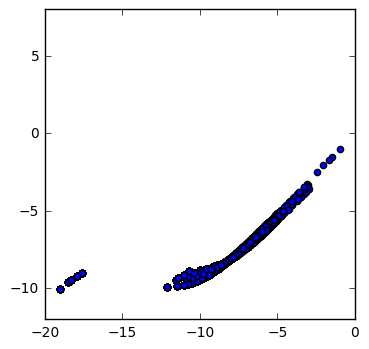

In [50]:
plt.scatter(theta_nb_001.values(),theta_nb_10.values());
plt.axis('square');

# 4. Perceptron 

Total: 2 points

The perceptron update is,

\begin{align}
\hat{y} = & \text{argmax}_y \theta^\top f(x,y)\\
\theta \gets & \theta + f(x,y) - f(x,\hat{y})
\end{align}

You will now implement this classifier, using the file ```gtnlplib/perceptron.py```

In [51]:
from gtnlplib import perceptron
reload(perceptron)

<module 'gtnlplib.perceptron' from 'gtnlplib\perceptron.pyc'>

** Deliverable 4.1 **

Implement the perceptron *update*, $f(x,y) - f(x,\hat{y})$, in the function ```perceptron_update``` in ```perceptron.py```. (0.5 points)

In [52]:
theta_perc = hand_weights.theta_hand_original.copy() #let's start with the hand-set weights

In [53]:
# no update when the prediction is correct
update = perceptron.perceptron_update(x_tr[110],y_tr[110],theta_perc,labels)

In [54]:
print update

defaultdict(<type 'float'>, {})


In [55]:
# update when the prediction is incorrect
i=20
update =perceptron.perceptron_update(x_tr[i],y_tr[i],theta_perc,labels)
print update.items()[:5]
print len(update)

[((u'science', u'and'), 2.0), ((u'iama', u'200'), -1.0), ((u'iama', u'genes'), -3.0), ((u'iama', u'now'), -1.0), ((u'science', u'years'), 1.0)]
146


** Deliverable 4b **

Now implement the perceptron algorithm. Your implementation should take as inputs:

- The training instances $x$
- The training labels $y$
- The number of iterations to train

It should use your ```update``` function, and it should return:

- weights $\theta$
- a list of the weights at each iteration

Specifically, you should implement ```estimate_perceptron``` in ```perceptron.py``` (0.5 points)

In [56]:
reload(perceptron);

In [57]:
theta_perc,theta_perc_history = perceptron.estimate_perceptron(x_tr[:10],y_tr[:10],3)

In [58]:
print theta_perc[('science','its')]
print theta_perc[('science','what')]

0.0
4.0


I'm including the running time (on my lenovo X1 carbon laptop) for reference:

In [59]:
%%timeit
theta_perc,theta_perc_history = perceptron.estimate_perceptron(x_tr,y_tr,20)

1 loop, best of 3: 27.8 s per loop


In [60]:
theta_perc,theta_perc_history = perceptron.estimate_perceptron(x_tr,y_tr,50)

In [61]:
# run this to plot the accuracy over iterations
def plot_accs(weight_history,x_tr=x_tr,y_tr=y_tr,x_dv=x_dv,y_dv=y_dv):
    tr_accs = []
    dv_accs = []
    for theta in weight_history:
        tr_accs.append(evaluation.acc(clf_base.predict_all(x_tr,theta,labels),y_tr))
        dv_accs.append(evaluation.acc(clf_base.predict_all(x_dv,theta,labels),y_dv))
    plt.plot(tr_accs,'--')
    plt.plot(dv_accs)
    plt.xlabel('iteration')
    plt.ylabel('accuracy');
    plt.legend(['training','dev'],loc='lower right');
    return tr_accs,dv_accs

In [62]:
y_hat = clf_base.predict_all(x_dv,theta_perc,labels)
print evaluation.acc(y_hat,y_dv)

0.646


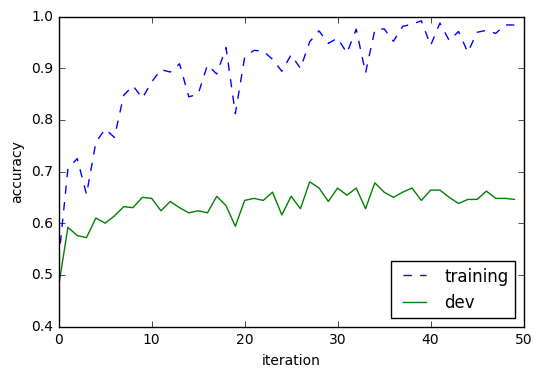

In [63]:
plot_accs(theta_perc_history);

In [64]:
# execute this code to write the predictions on the dev and training data
y_hat_dv = clf_base.predict_all(x_dv,theta_perc,labels)
evaluation.write_predictions(y_hat_dv,'perc-dev.preds')
y_hat_te = clf_base.predict_all(x_te,theta_perc,labels)
evaluation.write_predictions(y_hat_te,'perc-test.preds')

## Averaged Perceptron 

You will now implement the averaged perceptron, which often achieves better generalization than the standard perceptron. The basic idea, as described in the notes, is to average the weights across each update:

\begin{align}
\hat{y} \gets & \text{argmax}_y \theta^{\top}f(x,y)\\
\theta_t \gets & f(x,y) - f(x,\hat{y})\\
m \gets & m + \theta_t\\
\overline{\theta} \gets & \frac{m}{t}
\end{align}

Note that during training, prediction is performed using the non-averaged weights, $\theta$. The averaged weights are only returned at the end. They often give better generalization than the standard perceptron.

However, it is too inefficient to repeatedly compute the sum $m + \theta_t$. The reason is that we must perform an operation for every feature with non-zero weight. There are many more such features than there are non-zero features in any given example, $f(x_i, y)$. Therefore, this addition will dominate the computation.

An efficient solution was pointed out by [Daume 2006](http://hal3.name/docs/daume06thesis.pdf). 
Let $\delta_t$ indicate the update at time $t$.
Assuming $\theta^0 = 0$, 
\begin{align*}
\theta^t = & \theta^{t-1} + \delta_t \\
= & \sum_{t' < t} \delta_{t'}
\end{align*}

We would like to compute the sum of the weight vectors,
\begin{align*}
\sum_t^T \theta_t = & \sum_t^T \sum_{t' \leq t} \delta_{t'} = T \delta_0 + (T-1) \delta_1 + (T - 2) \delta_2 + \ldots + \delta_T \\ 
= & \sum_t^T (T - t) \delta_t\\
= & T \sum_t^T \delta_t - \sum_t^T t \delta_t \\
= & T \theta_t - \sum_t^T t \delta_t \\
\frac{1}{T} \sum_t^T \theta_t = & \theta_T - \frac{1}{T} \sum_t^T t \delta_t
\end{align*}

This means we need to keep another running sum, $\sum_t^T t \delta_t$, the sum of scaled updates. 
To compute the average, we divide by the number of updates $T$ and subtract it from the current weight vector.

**Deliverable 4.3**

Implement ```estimate_average_perceptron``` in ```perceptron.py```. (1 point)

In [100]:
reload(perceptron);

In [101]:
theta_avp,theta_avp_history = perceptron.estimate_avg_perceptron(x_tr[:10],y_tr[:10],3)

In [102]:
%%timeit
theta_avp,theta_avp_history = perceptron.estimate_avg_perceptron(x_tr,y_tr,20)

1 loop, best of 3: 25 s per loop


In [103]:
theta_avp,theta_avp_history = perceptron.estimate_avg_perceptron(x_tr,y_tr,50)

In [104]:
y_hat = clf_base.predict_all(x_dv,theta_avp,labels)
print evaluation.acc(y_hat,y_dv)

0.664


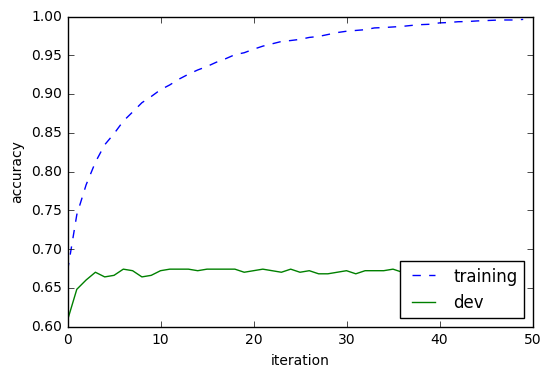

In [105]:
plot_accs(theta_avp_history);

In [106]:
# execute this code to write the predictions on the dev and training data
y_hat_dv = clf_base.predict_all(x_dv,theta_avp,labels)
evaluation.write_predictions(y_hat_dv,'avp-dev.preds')
y_hat_te = clf_base.predict_all(x_te,theta_avp,labels)
evaluation.write_predictions(y_hat_te,'avp-test.preds')

In [107]:
evaluation.acc(y_hat_te,y_te)

0.0

# 5. Logistic regression

Total: 2 points

**Deliverable 5.1** Write a function to compute the conditional probability,
\begin{equation}
p(y \mid x; \theta) = \frac{\exp(\theta^{\top} f(x,y))}{\sum_{y'}\exp(\theta^{\top} f(x,y'))}
\end{equation}

Implement this in ```compute_py``` in ```logreg.py```. You should use your ```predict``` function from ```clf_base.py```.

(0.5 points)

In [73]:
from gtnlplib import logreg
reload(logreg);

In [74]:
logreg.compute_py({'i':1,'am':2},theta_hand,labels)

{u'askreddit': 0.19587982773688248,
 u'iama': 0.21648068905247014,
 u'science': 0.19587982773688248,
 u'todayilearned': 0.19587982773688248,
 u'worldnews': 0.19587982773688248}

In [75]:
logreg.compute_py({'i':1,'news':2,'science':1},theta_hand,labels)

{u'askreddit': 0.11707223997893113,
 u'iama': 0.12938483493868785,
 u'science': 0.31823534255172503,
 u'todayilearned': 0.11707223997893113,
 u'worldnews': 0.31823534255172503}

**Deliverable 5.2** Complete the function ```estimate_logreg``` in ```logreg.py```. (1 point)

In [76]:
# train on the first ten instances
theta_lr,theta_lr_hist = logreg.estimate_logreg(x_tr[:10],y_tr[:10],3)

0 1 2


In [77]:
# this takes approximately 2 minutes to execute on my laptop
theta_lr,theta_lr_hist = logreg.estimate_logreg(x_tr,y_tr,20)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


In [78]:
y_hat = clf_base.predict_all(x_dv,theta_lr,labels)
evaluation.write_predictions(y_hat,'lr-dev.preds')
print evaluation.acc(y_hat,y_dv)

0.604


In [79]:
y_hat_te = clf_base.predict_all(x_te,theta_lr,labels)
evaluation.write_predictions(y_hat_te,'lr-test.preds')

In [80]:
print evaluation.acc(y_hat_te,y_te)

0.0


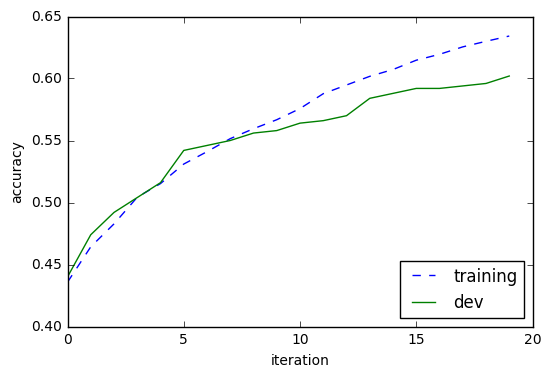

In [81]:
plot_accs(theta_lr_hist);

The figure suggests that you can get higher accuracy by training for longer.

**Deliverable 5.3** 


- Try to improve on the performance that you get with the default hyperparameters.
- Specifically, try different values for regularization, learning rate, and number of iterations
- Because training is somewhat slow, you will have to be careful in how you do this.
- Write the predictions of your best models to ```lr-best-dev.preds``` and ```lr-best-test.preds```.
- You should be able to get at least 66% accuracy on the dev set.
- As you try different configurations **save the weights** for each configuration separately. This will help you with problem 6.2.

(0.5 points)


In [82]:
reload(logreg)
theta_lr_20_e4_e2,theta_lr_hist_20_e4_e2 = logreg.estimate_logreg(x_tr,y_tr,20,1e-4,1e-2) #add your hyperparameters

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


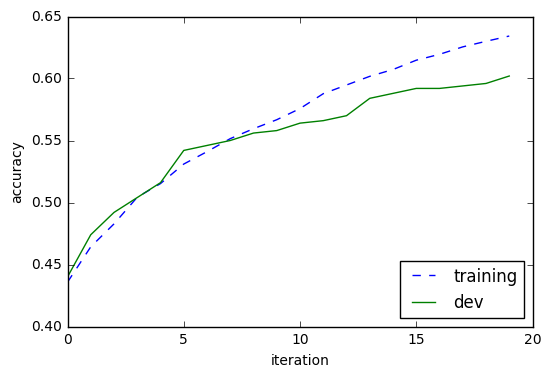

In [83]:
plot_accs(theta_lr_hist_20_e4_e2);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


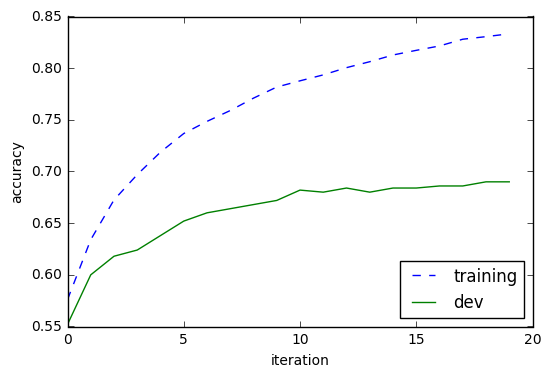

In [84]:
theta_lr_20_e3_e2,theta_lr_hist_20_e3_e2 = logreg.estimate_logreg(x_tr,y_tr,20,1e-3,1e-2)
plot_accs(theta_lr_hist_20_e3_e2);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


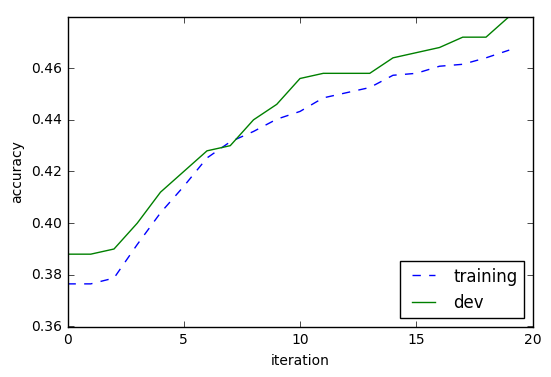

In [85]:
theta_lr_20_e5_e2,theta_lr_hist_20_e5_e2 = logreg.estimate_logreg(x_tr,y_tr,20,1e-5,1e-2)
plot_accs(theta_lr_hist_20_e5_e2);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


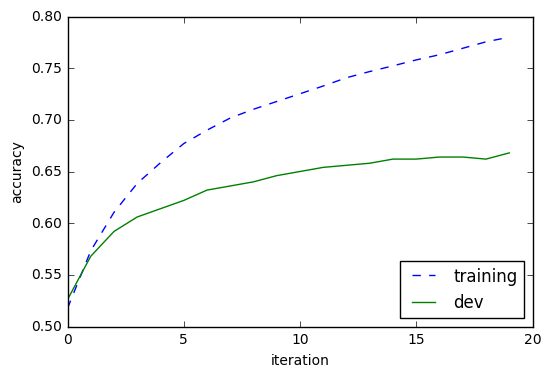

In [86]:
theta_lr_20_5e4_e2,theta_lr_hist_20_5e4_e2 = logreg.estimate_logreg(x_tr,y_tr,20,5e-4,1e-2)
plot_accs(theta_lr_hist_20_5e4_e2);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


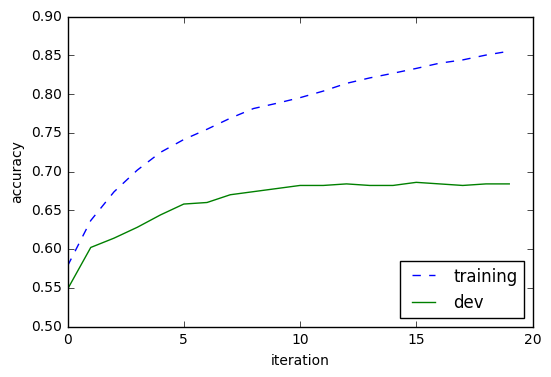

In [87]:
theta_lr_20_e3_5e3,theta_lr_hist_20_e3_5e3 = logreg.estimate_logreg(x_tr,y_tr,20,1e-3,5e-3)
plot_accs(theta_lr_hist_20_e3_5e3);

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


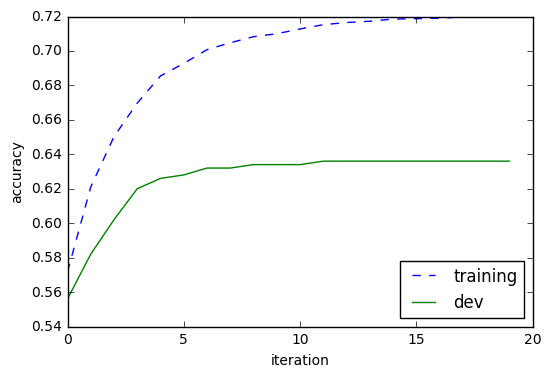

In [88]:
theta_lr_20_e3_5e2,theta_lr_hist_20_e3_5e2 = logreg.estimate_logreg(x_tr,y_tr,20,1e-3,5e-2)
plot_accs(theta_lr_hist_20_e3_5e2);

In [89]:
theta_lr_best,theta_lr_hist_best = logreg.estimate_logreg(x_tr,y_tr,30,1e-3,1e-2)#add your hyperparameters

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29


In [90]:
y_hat = clf_base.predict_all(x_dv,theta_lr_best,labels)
evaluation.write_predictions(y_hat,'lr-best-dev.preds')
y_hat_te = clf_base.predict_all(x_te,theta_lr_best,labels)
evaluation.write_predictions(y_hat_te,'lr-best-test.preds')

In [91]:
# here are the scores for some weights that i got
y_hat_dv = evaluation.read_predictions('lr-best-dev.preds')
print evaluation.acc(y_hat_dv,y_dv)

0.69


In [92]:
y_hat_te = evaluation.read_predictions('lr-best-test.preds')
print evaluation.acc(y_hat_te,y_te)

0.0


# 6. Feature analysis

1 points for 4650; 0.5 point for 7650

** Deliverable 6.1**

Implement ```get_top_features_for_label``` in ```clf_base.py```. (0.5 points for 4650 / .25 points for 7650)

In [93]:
reload(clf_base);

In [94]:
clf_base.get_top_features_for_label(theta_lr_best,'science',5)

[((u'science', u'research'), 0.3979772677749629),
 ((u'science', u'ebv'), 0.34373597516511922),
 ((u'science', u'study'), 0.3400641527864991),
 ((u'science', u'corn'), 0.29988960399084325),
 ((u'science', u'pollution'), 0.29517226190207235)]

In [95]:
clf_base.get_top_features_for_label(theta_lr_best,'worldnews',5)

[((u'worldnews', u'ai'), 0.40020306336740924),
 ((u'worldnews', u'plane'), 0.38981135907040065),
 ((u'worldnews', u'ukraine'), 0.37723576191770108),
 ((u'worldnews', u'russia'), 0.36992453803598779),
 ((u'worldnews', u'russian'), 0.35846703667255897)]

**Deliverable 6.2**

- Now compare the top 5 features and weights for logistic regression under the largest regularizer and smallest regularizer that you tried in problem 5.3. 
- Paste the output into ```text_answers.md```, and explain the difference.
- You cannot get full credit if your logistic regression classifier is not implemented correctly, so make sure you pass the units tests for part 5 before starting this.
- 0.5 points for 4650 / 0.25 points for 7650. 

In [96]:
for l in labels:
    print "0.05:"
    print "\n".join([str(f) for f in clf_base.get_top_features_for_label(theta_lr_20_e3_5e2,l,5)])
    print "0.005:"
    print "\n".join([str(f) for f in clf_base.get_top_features_for_label(theta_lr_20_e3_5e3,l,5)])

0.05:
((u'worldnews', u'russia'), 0.21164030663434966)
((u'worldnews', u'ukraine'), 0.19671864042167875)
((u'worldnews', u'plane'), 0.19669045608682853)
((u'worldnews', u'russian'), 0.18417769664697603)
((u'worldnews', u'ai'), 0.15984736846733932)
0.005:
((u'worldnews', u'plane'), 0.42643638297587105)
((u'worldnews', u'ai'), 0.41775992334006445)
((u'worldnews', u'russia'), 0.41724488664425463)
((u'worldnews', u'ukraine'), 0.41630247642581375)
((u'worldnews', u'russian'), 0.39469292304958775)
0.05:
((u'science', u'research'), 0.19569802904231817)
((u'science', u'study'), 0.17301368568183625)
((u'science', u'ebv'), 0.17121189726546729)
((u'science', u'corn'), 0.16426017282603228)
((u'science', u'food'), 0.1241729580023808)
0.005:
((u'science', u'research'), 0.42934181356001561)
((u'science', u'ebv'), 0.37643188783942472)
((u'science', u'study'), 0.37304111650818067)
((u'science', u'corn'), 0.329167186084251)
((u'science', u'evolution'), 0.30833764933954172)
0.05:
((u'askreddit', u'one'),

# 7. Better preprocessing

Total: 1 points for CS 4650; 0.5 points for CS 7650.

Now try to make some changes to the preprocessing code to improve the performance of these classifiers.

**Deliverable 7.1** 

- Write the function ```custom_preproc``` in ```preproc.py```
- Then load the data using the code below
- Choose one of the classifiers, train it on this new data, and print out the predictions on the test set and dev, using the code block below that.

Full credit for doing something interesting, +1 points for beating my best test set score. (0.75 point for 4650 / 0.25 points for 7650)

In [261]:
reload(preproc);

In [273]:
y_tr_bake,x_tr_bake = preproc.read_data('reddit-train.csv', #filename
                                    'subreddit', #label field
                                    preprocessor=preproc.custom_preproc) #your preprocessor
y_dv_bake,x_dv_bake = preproc.read_data('reddit-dev.csv', #filename
                                    'subreddit', #label field
                                    preprocessor=preproc.custom_preproc) #your preprocessor
y_te_bake,x_te_bake = preproc.read_data('reddit-test.csv', #filename
                                    'subreddit', #label field
                                    preprocessor=preproc.custom_preproc) #your preprocessor

In [274]:
# use this block to train your classifier on the new data.
# you don't have to use Naive Bayes!
theta_lr = logreg.estimate_logreg(x_tr_bake,y_tr_bake,20,learning_rate=1e-3,regularizer=1e-2)

In [292]:
y_hat_dv_bake = clf_base.predict_all(x_dv_bake,theta_lr,labels)
evaluation.write_predictions(y_hat_dv_bake,'bakeoff-dev.preds')

In [290]:
# Here's how well my preprocessed features do on the dev set
evaluation.acc(y_hat_dv_bake,y_dv_bake)

0.78200000000000003

In [291]:
y_hat_te_bake = clf_base.predict_all(x_te_bake,theta_nb,labels)
evaluation.write_predictions(y_hat_te_bake,'bakeoff-test.preds')

In [ ]:
# Here's how well my preprocessed features do on the test set
evaluation.acc(y_hat_te_bake,y_te_bake)

** Deliverable 7.2 **

Explain your novel preprocessing code in ```text-answers.md```

(0.25 points for 4650, 0.25 points for 7650)

# 8. 7650 Research Question

(1 point.) CS 4650 students may do this component if they want; if they do, then the assignment will be graded as if they are in 7650. This is optional for CS4650 students, but if you submit something for this part, that is how you will be scored -- we're not taking the max over the two possible scoring options. CS 7650 students must do this part.

You will select a recent research paper that performs *document* classification, using text. Summarize the paper, answering the following questions:

- What are the labels, and how were they obtained?
- Why is it interesting/useful to predict these labels?  
- What classifier(s) do they use, and the reasons behind their choice? Do they use linear classifiers like the ones in this problem set?
- What features do they use? Explain any features outside the bag-of-words model, and why they used them.
- What is the conclusion of the paper? Do they compare between classifiers, between feature sets, or on some other dimension? 
- Give a one-sentence summary of the message that they are trying to leave for the reader.

Your selection of papers is determined by the last digit of your GTID.

- Digits 0,1: choose from ACL 2016, AAAI 2016
- Digits 2,3,4: choose from NAACL 2016, KDD 2016
- Digits 5,6,7: choose from EMNLP 2016, ICWSM 2016
- Digits 8,9: choose from ACL 2015, IJCAI 2016

You must choose a paper in the main conference (not workshops). The paper must be at least four pages long. All papers from these conferences are available for free online.